<div align="center">
  <h1> <a href="https://github.com/QunaSys/quantum-algorithm-grand-challenge/tree/main"> Quantum Algorithm Grand Challenge</a></h1>
  <h2> Applying the HVA method to find the Fermi-Hubbard Ground State </h2>
</div>
<br>

<div align="center">
  <b>Author: <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a></b>
</div>

<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/qagc"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table> 

In [1]:
%autosave 60

Autosaving every 60 seconds


# Description

Various approaches have been proposed to create effective hardware-efficient and chemistry-inspired ansatz. One such ansatz is the trotterized UCCSD ansatz which, although based on the accurate Coupled-cluster theory, suffers from inconsistency under low-order trotterization steps [1] when shallow circuits friendly to NISQ devices provide a poor approximation to the UCCSD wavefunction. 

On the optimization side, gradient-based algorithms for the optimization of variational quantum circuits have also been explored, such as the Bayesian model gradient descent (BayesMGD) [2], the model gradient descent (MGD) [3], the [SPSA](https://quri-parts.qunasys.com/quri_parts/algo/quri_parts.algo.optimizer.html#quri_parts.algo.optimizer.SPSA), [Adam](https://quri-parts.qunasys.com/quri_parts/algo/quri_parts.algo.optimizer.html#quri_parts.algo.optimizer.Adam), [L-BFGS](https://quri-parts.qunasys.com/quri_parts/algo/quri_parts.algo.optimizer.html#quri_parts.algo.optimizer.LBFGS), [NFT](https://quri-parts.qunasys.com/quri_parts/algo/quri_parts.algo.optimizer.html#quri_parts.algo.optimizer.NFT), and the ADAPT-VQE [4] which strongly relies on the parameter-shift rule to compute the gradient of the gates in order to optimize the Euler angles and change the circuit structure on-the-fly [5]. Gradient-free optimization algorithms include the Rotosolve, Rotoselect [6], and the NelderMead method, to name a few. The mainstream literature states that gradient-based methods are more efficient with faster convergence if gradients can be computed directly [7] [8]. 

The characteristic of the Hubbard model suggests the application of the Hamiltonian variational method [9] which uses terms of the Hamiltonian to propose the circuit ansatz with a smaller circuit depth than the unitary coupled cluster method (UCC).

In this solution, gradient-free and gradient-based optimizations were compared, and the final algorithm was chosen based on its computational time (speed) and convergence.

\[1] Grimsley, H. R.; Claudino, D.; Economou, S. E.; Barnes, E.; Mayhall, N. J. Is the trotterized uccsd ansatz chemically well-defined? [J. Chem. Theory Comput. 2020, 16, 1](https://pubs.acs.org/doi/abs/10.1021/acs.jctc.9b01083).

\[2] Stanisic, S., Bosse, J.L., Gambetta, F.M. et al. Observing ground-state properties of the Fermi-Hubbard model using a scalable algorithm on a quantum computer. [Nat Commun 13, 5743 (2022).](https://www.nature.com/articles/s41467-022-33335-4)

\[3] Sung, K. J. et al. Using models to improve optimizers for variational quantum algorithms. Quantum Sci. Technol. 5, 044008 (2020).

\[4] Harper R. Grimsley, Sophia E. Economou, Edwin Barnes, Nicholas J. Mayhall, "An adaptive variational algorithm for exact molecular simulations on a quantum computer". [Nat. Commun. 2019, 10, 3007](https://www.nature.com/articles/s41467-019-10988-2).

\[5] Lucas Camponogara Viera and José Paulo Marchezi. "Extending Adaptive Methods for Finding an Optimal Circuit Ansatze in VQE Optimization". [QHack2022 Open Hackathon Project - Quantum Chemistry Challenge.](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project)

\[6] Mateusz Ostaszewski, Edward Grant, Marcello Bendetti. "Structure optimization for parameterized quantum circuits." [Quantum 5, 391 (2021).](https://quantum-journal.org/papers/q-2021-01-28-391/)

\[7] J. Li, X. Yang, X. Peng, and C.-P. Sun, [Phys. Rev. Lett. 118, 150503 (2017)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.118.150503).

\[8] K. Mitarai, M. Negoro, M. Kitagawa, and K. Fujii, [Phys. Rev. A 98, 032309 (2018)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.032309).

\[9] Wecker, D., Hastings, M. B. & Troyer, M. Progress towards practical quantum variational algorithms. [Phys. Rev. A 92](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.92.042303), 042303 (2015).

\[10] Chris Cade, Lana Mineh, Ashley Montanaro, and Stasja Stanisic. Strategies for solving the Fermi-Hubbard model on near-term quantum computers. [Phys. Rev. B 102, 235122](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.102.235122).

\[11] Jiang, Z., Sung, K. J., Kechedzhi, K., Smelyanskiy, V. N. & Boixo, S. Quantum algorithms to simulate many-body physics of correlated fermions. Phys. Rev. Appl. 9, 044036 (2018).

# Theoretical background

## First Quantization

[comment]: <> (To enable strikethrough symbol:)
$$\require{cancel}$$  <!--strikethrough -->

In the first quantization formalism, the framework of the old quantum mechanics theory, the molecular electronic Hamiltonian reads:

\begin{align}
\hat{H} = -\underbrace{\sum_i^e \frac{\hbar^2 \nabla^2_i}{2 m_e}}_\text{kinetic-electrons} - \underbrace{\sum_i^n \frac{\hbar^2\nabla^2_i}{2 M_i}}_\text{kinetic-nuclei} + \underbrace{\sum_{i \ne j}^e \frac{e^2}{4\pi\epsilon_0|\mathbf{r}_i-\mathbf{r}_j|}}_\text{electron-electron Coulomb repulsions} + \underbrace{\sum_{i \ne j}^n \frac{Z_i Z_j e^2}{4\pi\epsilon_0|\mathbf{R}_i-\mathbf{R}_j|}}_\text{nuclei-nuclei repulsions}-\underbrace{\sum_i^e\sum_j^n \frac{Z_je^2}{4\pi\epsilon_0|\mathbf{r}_i-\mathbf{R}_j|}}_\text{electron-nuclei atractions}.
\end{align}

Under the [Born-Oppenheimer approximation](https://en.wikipedia.org/wiki/Born%E2%80%93Oppenheimer_approximation), where the nuclei is assumed to be stationary with respect to the electron, one can eliminate the kinetic energy term of the nuclei, while the kinetic term of nuclei-nuclei repulsion becomes a constant $C$:

\begin{align}
\hat{H}_{approx} &= -\sum_i^e \frac{\hbar^2 \nabla^2_i}{2 m_e} - \cancel{\sum_i^n \frac{\hbar^2\nabla^2_i}{2 M_i}} + \sum_{i \ne j}^e \frac{e^2}{4\pi\epsilon_0|\mathbf{r}_i-\mathbf{r}_j|} + \sum_{i \ne j}^n \cancel{\frac{Z_i Z_j e^2}{4\pi\epsilon_0|\mathbf{R}_i-\mathbf{R}_j|}} + C -\sum_i^e\sum_j^n \frac{Z_je^2}{4\pi\epsilon_0|\mathbf{r}_i-\mathbf{R}_j|} \\
&=-\sum_i^e \frac{\hbar^2 \nabla^2_i}{2 m_e} + \sum_{i \ne j}^e \frac{e^2}{4\pi\epsilon_0|\mathbf{r}_i-\mathbf{r}_j|} + C -\sum_i^e\sum_j^n \frac{Z_je^2}{4\pi\epsilon_0|\mathbf{r}_i-\mathbf{R}_j|} .
\end{align}

A convenient or short version of the above is the reduced Hamiltonian:

$$\hat{H}_{approx} = -\sum_{i}^e \frac{1}{2} \nabla_i^2 + \sum_{i \ne j}^e \frac{1}{|\mathbf{r}_i-\mathbf{r}_j|} + C -\sum_i^e\sum_j^n \frac{Z_j}{|\mathbf{r}_i-\mathbf{R}_j|},$$

where $\frac{\hbar^2}{m_e} \doteq 1$ and $\frac{e^2}{4\pi\epsilon_0} \doteq 1$.

## Slater determinant

The wavefunction of a many-body fermionic system can be approximated by a single [slater determinant](https://en.wikipedia.org/wiki/Slater_determinant) which has the property of being antisymmetric under exchange of two electrons (or other fermions):

\begin{align}
\Psi(\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N) 
&= \frac{1}{\sqrt{N!}} 
\begin{vmatrix} 
\chi_1(\mathbf{x}_1) & \chi_2(\mathbf{x}_1) & \cdots & \chi_N(\mathbf{x}_1) \\
\chi_1(\mathbf{x}_2) & \chi_2(\mathbf{x}_2) & \cdots & \chi_N(\mathbf{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\chi_1(\mathbf{x}_N) & \chi_2(\mathbf{x}_N) & \cdots & \chi_N(\mathbf{x}_N)
\end{vmatrix} 
\equiv | \chi _1, \chi _2, \cdots, \chi _N \rangle.
\end{align}

Where:

- $\chi(\mathbf{x})$ denotes the spin-orbital.
- $\mathbf{x}$ denotes the position and spin coordinate of a single electron.

The wavefunction can also be represented in the occupation number formalism as

$$\Psi = \sum_i c_i |\chi_i\chi_j \cdots \chi_N \rangle \equiv |ij \dots N \rangle.$$

Givens rotations [11] are used to prepare the initial state of the system represented by slater determinants.

## Second Quantization

In the second quantization formalism, the framework of the modern quantum mechanics theory, the mapping from the first to the second quantization is given by the following rules:

1. Single-particle operator:

$$\sum_i h(\mathbf{x}_i) \rightarrow \sum_{pq} \langle p |\hat{h}|q \rangle \hat{a}_p^{\dagger}\hat{a}_q,$$

with 

$$\langle p|\hat{h}| q\rangle \equiv h_{pq} = \int_{-\infty}^{\infty} \psi_{p}(\mathbf{x}) \Bigg( \frac{1}{2}\nabla_i^2 - \sum_j^n \frac{Z_j}{|\mathbf{r}_i-\mathbf{R}_j|}\Bigg)\psi_{q}(\mathbf{x})d\mathbf{x}.$$


2. Two-particle operator (exchange term):

$$\sum_{i \ne j} h(\mathbf{x}_i, \mathbf{x}_j) \rightarrow \sum_{pqrs}\sum_{pq} \Bigg( \langle p_q |\hat{h}| r_s \rangle \hat{a}_p^{\dagger}\hat{a}_q^{\dagger}\hat{a}_r \hat{a}_s \Bigg),$$

with

$$\langle p_q |\hat{h}| r_s \rangle \equiv h_{pqrs} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  \psi_{p}^{\dagger}(\mathbf{x_1})\psi^{\dagger}_{q}(\mathbf{x_1}) \Bigg(\frac{1}{|\mathbf{r_1}-\mathbf{r_2}|}\Bigg)\psi_{r}(\mathbf{x_2})\psi_{s}(\mathbf{x_2})d\mathbf{x_1}d\mathbf{x_2}.$$

The molecular electronic Hamiltonian then reads:

$$\hat{H}_{approx} = h_{pq}\hat{a}_p^{\dagger}\hat{a}_q + h_{pqrs} \hat{a}_p^{\dagger}\hat{a}_q^{\dagger}\hat{a}_r \hat{a}_s + C.$$

Where 

- $p$, $q$, $r$ and $s$ denote the spin-orbitals.
- ${a}_p^{\dagger}$ is the creation operator.
- $\hat{a}_q$ is the annihilation operator.
- $C$ is the constant from the nuclei-nuclei repulsion under the [Born-Oppenheimer approximation](https://en.wikipedia.org/wiki/Born%E2%80%93Oppenheimer_approximation).

## The one-dimensional Fermi-Hubbard Hamiltonian

The Fermi-Hubbard model is a many-body system, i.e, a system of many electrons, proposed to describe the behaviour of correlated electrons in solids. It is an extension of the tight-binding model, a toy model in condensed matter physics.

To build the Hamiltonian of this system, the sum of kinetic energy and potential energy, one can thing of this system as a chain or lattice of atomic sites, where each site contains a single orbital. Following Pauli exclusion principle, where electrons can only occupy the same orbital if they have opposite spins, one can write the following states for each site of the lattice to represent the configuration of electrons in an orbital:

- $|0\rangle$: atomic site with no electron.
- $|\uparrow\rangle$: atomic site with one electron with spin up.
- $|\downarrow\rangle$: atomic site with one electron with spin down.
- $|\uparrow\downarrow\rangle$: atomic site with two electrons with opposite spins.

The kinetic energy term of the Hamiltonian has the form:

\begin{eqnarray}
\hat{H}_T = - t \sum_{i=0}^{N-1} \sum_{\sigma=\uparrow, \downarrow} (\hat{a}^\dagger_{i, \sigma}  \hat{a}_{i+1, \sigma} +  \hat{a}^\dagger_{i+1, \sigma}  \hat{a}_{i, \sigma}),
\end{eqnarray}

which can also be written as:

\begin{eqnarray}
\hat{H}_T = -t\sum_{\langle i,j\rangle,\sigma}(\hat{a}_{i,\sigma}^\dagger \hat{a}_{j,\sigma} + \hat{a}_{j,\sigma}^\dagger \hat{a}_{i,\sigma}).
\end{eqnarray}

Legend:

- $t$ denotes the tunneling amplitude describing an electron tunneling or "hopping" from a site $i$ to its nearest neighbor $j=i+1$.
- $\sigma$ denotes the spin quantum number.
- $\langle i,j \rangle$ denotes nearest neighbor atomic sites. 
- $\hat{a}_{i,\sigma}^\dagger$ and $\hat{a}_{i,\sigma}$ denotes creation and anihilation operators acting on site $i$ with spin $\sigma$, respectively. They represent the occupation of spin orbitals.
- $\hat{n} = \hat{a}^{\dagger}\hat{a}$ denotes the number (density) operator representing the number of excited states.

Creation and anihilation  operators have the following algebra:

\begin{eqnarray}
\hat{a}^\dagger |n\rangle &=& \sqrt{n+1}|n+1\rangle. \\
\hat{a}|n\rangle &=& \sqrt{n}|n-1\rangle. \\
\hat{a}^{\dagger}\hat{a}|n\rangle &=& n|n\rangle. \\
[\hat{a}_i, \hat{a}_j] &=& [\hat{a}_{i}^\dagger, \hat{a}_{j}^\dagger] = 0. \\
[\hat{a}_{i}, \hat{a}_{j}^\dagger] &=& \hat{a}_{i}\hat{a}_{j}^\dagger-\hat{a}_{j}^\dagger\hat{a}_{i} = \delta_{ij}. \\
\{\hat{a}_i, \hat{a}_j\}&=&\{\hat{a}_{i}^\dagger, \hat{a}_{j}^\dagger\} = 0. \\
\{\hat{a}_{i}, \hat{a}_{j}^\dagger\} &=& \hat{a}_{i}\hat{a}_{j}^\dagger+\hat{a}_{j}^\dagger\hat{a}_{i} = \delta_{ij}. \\
\{\hat{a}_{i,\sigma}^\dagger, \hat{a}_{j,\sigma'}\} &=& \delta_{i,j}\delta_{\sigma,\sigma'}. \\
\{\hat{a}_{i,\sigma}^\dagger, \hat{a}_{i,\sigma'}^\dagger\} &=& 0. \\
\{\hat{a}_{i,\sigma}, \hat{a}_{j,\sigma'}\} &=& 0.
\end{eqnarray}

In terms of matrix elements, the first two equations write:

\begin{eqnarray}
\langle m|a^{\dagger}|n\rangle &=& \sqrt{n+1} \delta_{m,n+1}.\\
\langle m|a|n\rangle &=& \sqrt{n} \delta_{m,n-1}.\\
\end{eqnarray}

Particular cases:
\begin{eqnarray}
\hat{a}|0\rangle &=& 0. \\
\hat{a}|1\rangle &=& 0. \\
\hat{a}^{\dagger}|0\rangle &=& |1\rangle. \\
\hat{a}^{\dagger}|1\rangle &=& \sqrt{2}|2\rangle.
\end{eqnarray}

For the potential energy term, the chemical potential $\mu$ describes the increase of energy per electron added to the system:

\begin{equation}
\hat{H}_\mu = -\mu \sum_{i,\sigma} \hat{n}_{i,\sigma} = - \mu \sum_{i=0}^{N-1} \sum_{\sigma=\uparrow, \downarrow}  \hat{a}^\dagger_{i, \sigma} \hat{a}_{i, \sigma}.
\end{equation}

Lastly, the local Coulomb interaction between electrons is given by the term:

\begin{eqnarray}
\hat{H}_U = U \sum_{i=0}^{N-1} \hat{n}_{i, \uparrow} \hat{n}_{i, \downarrow} = U \sum_{i=0}^{N-1} \hat{a}^\dagger_{i, \uparrow}  \hat{a}_{i, \uparrow}  \hat{a}^\dagger_{i, \downarrow} \hat{a}_{i, \downarrow},
\end{eqnarray}

where $U$ describes the Coulomb repulsion between pair of electrons occupying the same lattice site.

The full one-dimensional Fermi-Hubbard Hamiltonian thus becomes:

\begin{eqnarray}
\hat{H} &=& \hat{H}_T + \hat{H}_\mu + \hat{H}_U \\
&=& - t \sum_{i=0}^{N-1} \sum_{\sigma=\uparrow, \downarrow} (\hat{a}^\dagger_{i, \sigma}  \hat{a}_{i+1, \sigma} +  \hat{a}^\dagger_{i+1, \sigma}  \hat{a}_{i, \sigma})  - \mu \sum_{i=0}^{N-1} \sum_{\sigma=\uparrow, \downarrow}  \hat{a}^\dagger_{i, \sigma} \hat{a}_{i, \sigma} + U \sum_{i=0}^{N-1} \hat{a}^\dagger_{i, \uparrow}  \hat{a}_{i, \uparrow}  \hat{a}^\dagger_{i, \downarrow} \hat{a}_{i, \downarrow}.
\end{eqnarray}

## The [Jordan–Wigner mapping](https://en.wikipedia.org/wiki/Jordan%E2%80%93Wigner_transformation)

To perform gate-based quantum computation, one needs to map the fermionic Hamiltonian (second quantization) given in terms of its fermionic operators into a spin qubit-equivalent Hamiltonian using either Bravyi-Kitaev or the inverted Jordan–Wigner transformation. This transformation will map each atomic site a.k.a fermionic mode to a single qubit. The Jordan–Wigner transformation maps the creation and anihilation operators to Pauli matrices according to:

$$\hat{a}_i \rightarrow Z_1 \otimes \cdots \otimes Z_{i-1} \otimes \frac{1}{2}(X_i +i Y_i).$$
$$\hat{a}^{\dagger}_i \rightarrow Z_1 \otimes \cdots \otimes Z_{i-1} \otimes \frac{1}{2}(X_i - i Y_i).$$

Where:

- $i$ denotes the $i$-th fermionic mode.
- $X_i$ is the Pauli-X operator (gate) acting on the $i$-th mode.
- $Y_i$ is the Pauli-Y operator (gate) acting on the $i$-th mode.
- $Z_i$ is the Pauli-Z operator (gate) acting on the $i$-th mode.

Note that the tensor products of $Z$ are added to account for the anti-commutativity property of the creation and anihilation operators, i.e, the antisymmetry of fermions.

Particular cases:

- $\hat{a}_1 =\frac{1}{2}(X_1 +i Y_1).$
- $\hat{a}_2 = Z_1 \otimes \frac{1}{2}(X_2 +i Y_2).$
- $\hat{a}_3 = Z_1 \otimes Z_2 \otimes \frac{1}{2}(X_3 +i Y_3).$

Using $\sigma_j \sigma_k = \delta_{jk} \mathbb{I} + i\epsilon_{jkl} \sigma_l$ and also $[\sigma_j, \sigma_k] = 2i\epsilon_{ijk} \sigma_k$, the number operator becomes:

\begin{eqnarray} 
\hat{n}_i = \hat{a}_i^\dagger \hat{a}_i &=& \frac{1}{2}(X_i - i Y_i) \frac{1}{2}(X_i + i Y_i), \\
&=& \frac{1}{4}(X_i^2 + iX_iY_i - iY_iX_i + Y_i^2, \\
&=& \frac{1}{4}(\mathbb{I} + iX_iY_i - iY_iX_i + \mathbb{I}) \\
&=& \frac{1}{4}(2\mathbb{I}+i[X_i, Y_i]), \\
&=& \frac{1}{4}(2\mathbb{I}+i2i\epsilon_{123}\sigma_3), \\
&=& \frac{1}{4}(2\mathbb{I}-2Z_i), \\
&=& \frac{(\mathbb{I}-Z_i)}{2}.
\end{eqnarray}

With that:

- **Hopping Term:** $(\hat{a}^\dagger_{i, \sigma}  \hat{a}_{i+1, \sigma} +  \hat{a}^\dagger_{i+1, \sigma}  \hat{a}_{i, \sigma}) \rightarrow \frac{1}{2} (X_{i}X_{j} + Y_{i}Y_{j})Z_{i+1}\cdots Z_{j-1}.$

- **Chemical potential term:** $\hat{a}^\dagger_{i, \sigma} \hat{a}_{i, \sigma} \rightarrow \frac{(\mathbb{I}-Z_{i})}{2}.$

- **On-site term:** $\hat{a}^\dagger_{i, \uparrow}  \hat{a}_{i, \uparrow}  \hat{a}^\dagger_{i, \downarrow} \hat{a}_{i, \downarrow} \rightarrow \frac{1}{4} (\mathbb{I}-Z_{i, {\uparrow}})(\mathbb{I}-Z_{i, \downarrow}).$

Plugging the results into the fermionic Hamiltonian, one gets:

$$
    \hat{H} = -\frac{t}{2}\sum_{\langle ij\rangle}(X_{i}X_{j} + Y_{i}Y_{j})Z_{i+1}\cdots Z_{j-1} - \mu \sum_{i=0}^{N-1} \frac{(\mathbb{I}-Z_{i})}{2} + \frac{U}{4} \sum_{i=0}^{N-1} (\mathbb{I}-Z_{i, {\uparrow}})(\mathbb{I}-Z_{i, \downarrow}).
$$

## Trotter evolution

The dynamics of a system of particles is determined by the linear differential and time-dependent Schrödinger equation, which in the matrix mechanics formalism of the Hilbert state space a.k.a statevector reads:

\begin{eqnarray}
i \hbar\frac{d}{dt}|\psi(t)\rangle= \hat{H} |\psi(t)\rangle,
\end{eqnarray}

Alternatively, the Schrödinger equation of the time-dependent evolution operator $\hat{U}(t)$ writes:

\begin{equation} 
i\hbar \frac{d}{dt}(\hat{U}(t) |\psi(0)\rangle)=\hat{H}(t) (\hat{U}(t) |\psi(0)\rangle).
\end{equation}  

In the particular case of a **time-independent Hamiltonian (conservative system)**, solution for the Schrödinger equation writes:

$$|\psi(t+\Delta t)\rangle = e^{-iH\Delta t}|\psi(t)\rangle.$$

In most cases, it is convenient to decompose the Hamiltonian into a sum of reduced parts:

\begin{eqnarray}
\hat{H}= \sum_{i=1}^{N} \hat{H}_{i},
\end{eqnarray}

In general, the reduced Hamiltonians do not commute, i.e, $[\hat{H}_j, \hat{H}_k] \neq \mathbb{O}$, and thus $e^{-i\hat{H} t} \neq \prod_j e^{-i\hat{H}_j t}$, that is to say:

$$e^{-i\hat{H}t} = e^{-i\hat{H}_1\cdot t} \cdot e^{-i\hat{H}_2\cdot t} \cdots e^{-i\hat{H}_n\cdot t} \text{ iff } [\hat{H}_j, \hat{H}_k]=\mathbb{O}.$$

When $[\hat{H}_j, \hat{H}_k] \neq \mathbb{O}$, one cannot simply write the evolution operator $\hat{U}$ as a product of evolution operators, therefore, another method must be adopted. There are several techniques to approximate a time Unitary evolution $\hat{U}=e^{-i\hat{H}t/\hbar}$ into gate operations for quantum simulation, to name a few:

1. Trotter-Susuki formula.
2. Randomized evolution (Qdrift, density matrix exponentiation).
3. Linear combination of unitaries.
4. Quantum Walks (Qubitization).

Exact analytical solution for the Hubbard model is only available at one-dimension, nevertheless, one can apply the Lie product formula a.k.a Trotter-Susuki formula which is defined as (setting $\hbar\equiv1$):

\begin{align}
U_{Trotter}(t) = e^{-it\Big(\hat{H}_a + \hat{H}_b\Big)} \equiv \lim_{N\rightarrow\infty}\Big(e^{-it \hat{H}_a/N}e^{-it \hat{H}_b /N}\Big)^{N}.
\end{align}

Advantages of using Trotterization:

- The algorithm is ancilla-free.

- It leverages the commutative property of the component Hamiltonians to achieve efficient simulation.

- It preserves the locality property of some unidimensional systems with nearest neighbor interactions enabling quantum simulation speed up.

### Hopping terms

\begin{eqnarray}
e^{-i\Delta t(\frac{-t}{2})(X_i \otimes X_j + Y_i \otimes Y_j)} \approx e^{\frac{it\Delta t}{2}X_i \otimes X_j} e^{\frac{it\Delta t}{2}Y_i \otimes Y_j}.
\end{eqnarray}

Note that $Z$ terms are ignored for a Hamiltonian of a 3-site lattice.

#### $X_iX_j$ term

Using the spectral decomposition theorem for the operator function (see Appendix):

$$e^{\frac{it\Delta t}{2}X_i \otimes X_j} = e^{\frac{it\Delta t}{2}}\bigg(|++\rangle\langle ++|+|--\rangle\langle --|\bigg)+e^{\frac{-it\Delta t}{2}}\bigg(|+-\rangle\langle +-|+|-+\rangle\langle -+|\bigg).$$

In [2]:
import sympy as sym

theta = sym.symbols('theta')
zero = sym.Matrix([[1, 0]])  # A 2-D row-like (bra vector) sympy matrix representing the classical state <0|.
one = sym.Matrix([[0, 1]])   # A 2-D row-like (bra vector) sympy matrix representing the classical state <1|.
plus = 1/sym.sqrt(2) * (zero + one)   # 2-D row-like sympy matrix (bra vector) representing the superposition state <+| = 1/[sqrt(2)](<0| + <1|).
minus = 1/sym.sqrt(2) * (zero - one)  # 2-D row-like sympy matrix (bra vector) representing the superposition state <-| = 1/[sqrt(2)](<0| - <1|).

In [3]:
from sympy.physics.quantum import TensorProduct, OuterProduct

(
sym.exp(1j*theta)*(TensorProduct(plus.T,plus.T)@TensorProduct(plus,plus)
+TensorProduct(minus.T,minus.T)@TensorProduct(minus,minus))
+sym.exp(-1j*theta)*(TensorProduct(plus.T,minus.T)@TensorProduct(plus,minus)
+TensorProduct(minus.T,plus.T)@TensorProduct(minus,plus))
)

Matrix([
[exp(1.0*I*theta)/2 + exp(-1.0*I*theta)/2,                                        0,                                        0, exp(1.0*I*theta)/2 - exp(-1.0*I*theta)/2],
[                                       0, exp(1.0*I*theta)/2 + exp(-1.0*I*theta)/2, exp(1.0*I*theta)/2 - exp(-1.0*I*theta)/2,                                        0],
[                                       0, exp(1.0*I*theta)/2 - exp(-1.0*I*theta)/2, exp(1.0*I*theta)/2 + exp(-1.0*I*theta)/2,                                        0],
[exp(1.0*I*theta)/2 - exp(-1.0*I*theta)/2,                                        0,                                        0, exp(1.0*I*theta)/2 + exp(-1.0*I*theta)/2]])

Alternatively, recall that a single-qubit standard rotation gate $R_{\hat{n}}(\theta)$ performing an arbitrary angle of $\theta$ radians around an arbitrary $\hat{n}$ axis of the Bloch sphere can be generated by exponentiating the corresponding Pauli operator, as follows:

$$ R_{\hat{n}}(\theta) \equiv e^{\pm i(\hat{n} \cdot \vec{\sigma})\theta /2}= \cos(\theta/2) \mathbb{I} \pm i \sin(\theta/2)(\hat{n}\cdot \vec{\sigma}).$$

See the Appendix for a proof.

With that, the two-qubit $XX$ gate reads:

$$e^{\frac{it\Delta t}{2}X_i\otimes X_j} = \cos\Big(\frac{t\Delta t}{2}\Big) \mathbb{I} \otimes \mathbb{I} + i\sin\Big(\frac{t\Delta t}{2}\Big) X_i \otimes X_j.$$

In [4]:
theta = sym.symbols('theta')
X = sym.Matrix([[0, 1], [1, 0]])
XX = TensorProduct(X, X)

sym.cos(theta)*sym.eye(4) + 1j*sym.sin(theta)*XX

Matrix([
[      cos(theta),                0,                0, 1.0*I*sin(theta)],
[               0,       cos(theta), 1.0*I*sin(theta),                0],
[               0, 1.0*I*sin(theta),       cos(theta),                0],
[1.0*I*sin(theta),                0,                0,       cos(theta)]])

In [5]:
# Circuit for the XX(t) gate:

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

t = Parameter('t')
qc = QuantumCircuit(2, name='XX')
qc.h([0,1])
qc.cx(0, 1)
qc.rz(-t/2, 1)
qc.cx(0, 1)
qc.h([0,1])
qc.draw()

┌───┐                        ┌───┐
q_0: ┤ H ├──■──────────────────■──┤ H ├
     ├───┤┌─┴─┐┌────────────┐┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ Rz(-0.5*t) ├┤ X ├┤ H ├
     └───┘└───┘└────────────┘└───┘└───┘

This circuit was derived [here](https://github.com/QuCAI-Lab/quantum-circuit-theory/blob/dev/notebooks/04_two_qubit_gates.ipynb).

#### $Y_iY_j$ term

Similarly, 

\begin{eqnarray}
e^{\frac{it\Delta t}{2}Y_i \otimes Y_j} = e^{\frac{it\Delta t}{2}}\Bigg(|\oplus\oplus\rangle\langle \oplus\oplus|+|\ominus\ominus\rangle\langle \ominus\ominus|\Bigg) + e^{\frac{-it\Delta t}{2}}\Bigg(|\oplus\ominus\rangle\langle \oplus\ominus|+|\ominus\oplus\rangle\langle \ominus\oplus|\Bigg).
\end{eqnarray}

Alternatively, using the single-qubit standard rotation (proof in Appendix):

$$e^{\frac{it\Delta t}{2}Y_i \otimes Y_j} = \cos\Big(\frac{t\Delta t}{2}\Big) \mathbb{I} \otimes \mathbb{I} + i\sin\Big(\frac{t\Delta t}{2}\Big) Y_i \otimes Y_j.$$

In [6]:
Y = sym.Matrix([[0, -1j], [1j, 0]])
YY = TensorProduct(Y, Y)

sym.cos(theta)*sym.eye(4) + 1j*sym.sin(theta)*YY

Matrix([
[       cos(theta),                0,                0, -1.0*I*sin(theta)],
[                0,       cos(theta), 1.0*I*sin(theta),                 0],
[                0, 1.0*I*sin(theta),       cos(theta),                 0],
[-1.0*I*sin(theta),                0,                0,        cos(theta)]])

In [7]:
# Circuit for the YY(t) gate:

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

t = Parameter('t')
qc = QuantumCircuit(2, name='YY')
qc.sdg([0,1])
qc.h([0,1])
qc.cx(0, 1)
qc.rz(-t/2, 1)
qc.cx(0, 1)
qc.h([0,1])
qc.s([0,1])
qc.draw()

┌─────┐┌───┐                        ┌───┐┌───┐
q_0: ┤ Sdg ├┤ H ├──■──────────────────■──┤ H ├┤ S ├
     ├─────┤├───┤┌─┴─┐┌────────────┐┌─┴─┐├───┤├───┤
q_1: ┤ Sdg ├┤ H ├┤ X ├┤ Rz(-0.5*t) ├┤ X ├┤ H ├┤ S ├
     └─────┘└───┘└───┘└────────────┘└───┘└───┘└───┘

This circuit was derived [here](https://github.com/QuCAI-Lab/quantum-circuit-theory/blob/dev/notebooks/04_two_qubit_gates.ipynb).

### On-site terms

\begin{eqnarray}
e^{i\frac{U \Delta t}{4}(\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j)} &=& \sum_{n=0}^{\infty}\frac{\Big(i\frac{U \Delta t}{4}(\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j)\Big)^{n}}{n!}.
\end{eqnarray}

Recall that $(A\otimes B)(C \otimes D) = AC\otimes BD$, so that $(A\otimes B)^n = (A\otimes B)\cdots (A\otimes B) = A^n \otimes B^n$.

With that,

\begin{eqnarray}
e^{i\frac{U \Delta t}{4}(\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j)} &=& \sum_{\mathbf{n=0}}^{\infty}\frac{1}{n!}\Big(i\frac{U \Delta t}{4}\Big)^{n}(\mathbb{I}_2-Z_i)^n\otimes(\mathbb{I}_2-Z_j)^n \\
&=& \mathbb{I}_4 + \sum_{\mathbf{n=1}}^{\infty}\frac{1}{n!}\Big(i\frac{U \Delta t}{4}\Big)^{n}(\mathbb{I}_2-Z_i)^n\otimes(\mathbb{I}_2-Z_j)^n \\
&=& \mathbb{I}_4 - \frac{1}{4} (\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j) + \sum_{\mathbf{n=2}}^{\infty}\frac{1}{n!}\Big(i\frac{U \Delta t}{4}\Big)^{n}(\mathbb{I}_2-Z_i)^n\otimes(\mathbb{I}_2-Z_j)^n.
\end{eqnarray}

- For $n=0$, $(\mathbb{I}_2-Z_i)^0 \otimes (\mathbb{I}_2-Z_i)^0 = \mathbb{I}_2 \otimes \mathbb{I}_2 = \mathbb{I}_4$.

Moving on, using $(\mathbb{I}_2-Z_i)^n\otimes(\mathbb{I}_2-Z_j)^n = 4^{n-1}(\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j)$, one then gets

\begin{eqnarray}
e^{i\frac{U \Delta t}{4}(\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j)} &=&
\mathbb{I}_4 - \frac{1}{4} (\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j)  + \sum_{n=1}^{\infty}\frac{1}{n!}\Big(i\frac{U \Delta t}{4}\Big)^{n} 4^{n-1}(\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j) \\
&=& \mathbb{I}_4 - \frac{1}{4} (\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j)  + \frac{e^{iU\Delta t}}{4}(\mathbb{I}_2-Z_i)\otimes(\mathbb{I}_2-Z_j).
\end{eqnarray}

In [8]:
n=10
Z = sym.Matrix([[1, 0], [0, -1]])
TensorProduct((sym.eye(2)-Z)**n,(sym.eye(2)-Z)**n) == 4**(n-1)*TensorProduct((sym.eye(2)-Z),(sym.eye(2)-Z))

True

In [9]:
phi = sym.symbols('phi')
id2 = sym.eye(2)
id4 = sym.eye(4)
id4-1/4*TensorProduct((id2-Z),(id2-Z))+TensorProduct((id2-Z),(id2-Z))*sym.exp(1j*phi)/4

Matrix([
[1, 0, 0,              0],
[0, 1, 0,              0],
[0, 0, 1,              0],
[0, 0, 0, exp(1.0*I*phi)]])

## Change of basis for Measurement

This step is not required to build the circuit Ansatz, only to measure the circuit according to the basis of the Hamiltonian operator. Assuming that measurements will be computed by the quri backend, one can refer to this section for educational purposes. Recall that quantum computers can only perform quantum measurements in the $Z$-basis, and the output is a quantum state. Whereas expectation values are computed by the classical computer.

### On-site terms

The unitary matrix corresponding to the on-site term is already diagonalized in the $Z$-basis. So there is no need to add a change of basis circuit for measurements. The corresponding density matrix is $|11\rangle\langle11|$. Where $|11\rangle$ represents the composite (tensor product) bipartite state of two qubits, each qubit $q_j$ of site $j$ is in the $|1\rangle$ state. The on-site energy is, therefore, the probability of finding both qubits in state $|1\rangle$: 

$$E = \langle\psi|H|\psi\rangle = \langle0|U^{\dagger} H U |0\rangle.$$

### Hubbard terms

Hubbard terms require a change of basis since the unitary matrix is not diagonalized in the $Z$-basis. 

For $XX$ is the hadamard gate:

$$H|0\rangle = |+\rangle.$$
$$H|1\rangle = |-\rangle.$$

For $YY$ is the $SH$ gate:

$$SH|0\rangle = R_x(-\pi/2)|0\rangle = |\oplus\rangle.$$
$$SH|1\rangle = R_x(\pi/2)|0\rangle = |\ominus\rangle.$$

# Utils

In [1]:
import matplotlib.pyplot as plt

def plot(E_fci, iteration, energies):
    fig=plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(10)
    plt.plot(range(iteration), energies, "go", label=r"$E_\mathrm{HF}$", ls="dashed")
    plt.plot(range(iteration), np.full(iteration, E_fci), label=r"$E_\mathrm{FCI}$", color="red")
    plt.title('VQE optimization for the Fermi-Hubbard Model')
    plt.legend(loc='upper right')
    plt.xlabel('Optimization step')
    plt.ylabel('Energy (Hartree)')
    plt.show()

# Proposed ansatz

The following is the proposed circuit ansatz which consists of the on-site and hopping gates derived above from the time-evolution of the Fermi-Hubbard Hamiltonian.

In [2]:
from qiskit import QuantumCircuit as QuantumCircuitQiskit
from qiskit.quantum_info import Operator
import numpy as np

def qiskit_gates(n_sites=4, trotter_steps=1, parameters=None, barrier=False, 
                  t=1.0, delta_t=1.0, U=3.0):      
    '''
    delta_t: time difference parameter.
    U: on-site Coulomb repulsion between pair of electrons occupying the same lattice site.
    t: tunneling amplitude parameter from the Hopping term.
    '''       
    n_qubits = 2 * n_sites
    qc = QuantumCircuitQiskit(n_qubits)  
    total_no_of_gates = int(n_sites + (n_qubits) // 2) #+ 4*(n_sites-1))
    num_parameters = trotter_steps * total_no_of_gates
    
    if parameters is None:
        parameters = np.random.rand(num_parameters)*2*np.pi*0.001
        
    theta = t * delta_t / 2
    phi = 1j * U * delta_t
    
    def XX_gate(parameter):
        return Operator([[np.cos(parameter*theta), 0, 0, 1j * np.sin(parameter*theta)],
                         [0, np.cos(parameter*theta), 1j * np.sin(parameter*theta), 0],
                         [0, 1j * np.sin(parameter*theta), np.cos(parameter*theta), 0],
                         [1j * np.sin(parameter*theta), 0, 0, np.cos(parameter*theta)]])

    def YY_gate(parameter):
        return Operator([[np.cos(parameter*theta), 0, 0, -1j * np.sin(parameter*theta)],
                         [0, np.cos(parameter*theta), 1j * np.sin(parameter*theta), 0],
                         [0, 1j * np.sin(parameter*theta), np.cos(parameter*theta), 0],
                         [-1j * np.sin(parameter*theta), 0, 0, np.cos(parameter*theta)]])

    def Givens_Rotations(parameter):
        return Operator([[1, 0, 0, 0],
                         [0, np.cos(parameter/2), -np.sin(parameter/2), 0],
                         [0, np.sin(parameter/2), np.cos(parameter/2), 0],
                         [0, 0, 0, 1]]) 
    
    def on_site_gate(parameter, i, j):
        unitary_matrix = Operator([[1, 0, 0, 0],
                                   [0, 1, 0, 0],
                                   [0, 0, 1, 0],
                                   [0, 0, 0, np.exp(parameter*phi)]])
        qc.unitary(unitary_matrix, [i, j], label=f"Onsite θ[{parameter_index}]")
    
    def hopping_gate(parameter, i, j):
        qc.unitary(YY_gate(parameter), [i, j], label=f"YY Hop. θ[{parameter_index}]")
        qc.unitary(XX_gate(parameter), [i, j], label=f"XX Hop θ[{parameter_index}]")
        
    def hopping_gate2(parameter, i, j):
        unitary_matrix = np.array([[1, 0, 0, 0],
                                   [0, np.cos(parameter/2), -1j*np.sin(parameter/2), 0],
                                   [0, -1j*np.sin(parameter/2), np.cos(parameter/2), 0],
                                   [0, 0, 0, 1]])
        qc.unitary(unitary_matrix, [i, j], label=f"Hopping θ[{parameter_index}]")

    def get_angle():
        nonlocal parameter_index
        angle = parameters[parameter_index]
        parameter_index += 1
        return angle

    parameter_index = 0
    for _ in range(trotter_steps):
        '''
        for i in range(1, n_qubits-1, n_sites):
            qc.unitary(Givens_Rotations(get_angle()), [i, i+1], label=f"Givens-Rotations θ[{parameter_index}]")

        for i in range(0, n_qubits-1, 2):
            qc.unitary(Givens_Rotations(get_angle()), [i, i+1], label=f"Givens-Rotations θ[{parameter_index}]")

        for i in range(1, n_qubits-1, n_sites):
            qc.unitary(Givens_Rotations(get_angle()), [i, i+1], label=f"Givens-Rotations θ[{parameter_index}]")
        '''    
        if barrier:
            qc.barrier()
        
        for i in range(n_sites):
            on_site_gate(get_angle(), i, i + n_sites)
            
        if barrier:
            qc.barrier()
            
        #for i in range(0, n_sites-1):
            #hopping_gate(get_angle(), i, i+1)
            #hopping_gate(get_angle(), i+n_sites, i+1+n_sites)
            
        for i in range(0, n_qubits, 2):
            hopping_gate(get_angle(), i, i+1)
            #hopping_gate2(get_angle(), i, i + 1)
            
        if barrier:
            qc.barrier()
    
    return qc

In [3]:
qiskit_gates(barrier=True).draw()

░ ┌──────────────┐                                                 ░ »
q_0: ─░─┤0             ├─────────────────────────────────────────────────░─»
      ░ │              │┌──────────────┐                                 ░ »
q_1: ─░─┤              ├┤0             ├─────────────────────────────────░─»
      ░ │              ││              │┌──────────────┐                 ░ »
q_2: ─░─┤  Onsite θ[1] ├┤              ├┤0             ├─────────────────░─»
      ░ │              ││              ││              │┌──────────────┐ ░ »
q_3: ─░─┤              ├┤  Onsite θ[2] ├┤              ├┤0             ├─░─»
      ░ │              ││              ││              ││              │ ░ »
q_4: ─░─┤1             ├┤              ├┤  Onsite θ[3] ├┤              ├─░─»
      ░ └──────────────┘│              ││              ││              │ ░ »
q_5: ─░─────────────────┤1             ├┤              ├┤  Onsite θ[4] ├─░─»
      ░                 └──────────────┘│              ││              │ ░ »
q_6: ─░─────────────────────────────────┤1             ├┤              ├─░─»
      ░                                 └──────────────┘│              │ ░ »
q_7: ─░─────────────────────────────────────────────────┤1             ├─░─»
      ░                                                 └──────────────┘ ░ »
«     ┌───────────────┐┌──────────────┐ ░ 
«q_0: ┤0              ├┤0             ├─░─
«     │  YY Hop. θ[5] ││  XX Hop θ[5] │ ░ 
«q_1: ┤1              ├┤1             ├─░─
«     ├───────────────┤├──────────────┤ ░ 
«q_2: ┤0              ├┤0             ├─░─
«     │  YY Hop. θ[6] ││  XX Hop θ[6] │ ░ 
«q_3: ┤1              ├┤1             ├─░─
«     ├───────────────┤├──────────────┤ ░ 
«q_4: ┤0              ├┤0             ├─░─
«     │  YY Hop. θ[7] ││  XX Hop θ[7] │ ░ 
«q_5: ┤1              ├┤1             ├─░─
«     ├───────────────┤├──────────────┤ ░ 
«q_6: ┤0              ├┤0             ├─░─
«     │  YY Hop. θ[8] ││  XX Hop θ[8] │ ░ 
«q_7: ┤1              ├┤1             ├─░─
«     └───────────────┘└──────────────┘ ░

In [4]:
def quri_gates(n_sites, trotter_steps, params, option, t=1.0, delta_t=1.0, U=3.0):
    n_qubits = 2*n_sites
    if option == 1:
        circuit = UnboundParametricQuantumCircuit(n_qubits)
    elif option == 2:
        circuit = QuantumCircuit(n_qubits)
    theta = t * delta_t / 2
    phi = 1j * U * delta_t
    index = 0
    
    sqrt_iS = np.array([[1, 0, 0, 0],
                        [0, 1/np.sqrt(2), 1j/np.sqrt(2), 0],
                        [0, 1j/np.sqrt(2), 1/np.sqrt(2), 0],
                        [0, 0, 0, 1]])
        
    def XX_gate(parameter, i, j):
        circuit.add_H_gate(i)
        circuit.add_H_gate(j)
        circuit.add_CNOT_gate(i, j)
        if option == 1:
            circuit.add_ParametricRZ_gate(j)
        elif option == 2:
            circuit.add_RZ_gate(index=j, angle=theta*parameter) 
        circuit.add_CNOT_gate(i, j)
        circuit.add_H_gate(i)
        circuit.add_H_gate(j)

    def YY_gate(parameter, i, j):
        circuit.add_Sdag_gate(i)
        circuit.add_Sdag_gate(j)
        circuit.add_H_gate(i)
        circuit.add_H_gate(j)
        circuit.add_CNOT_gate(i, j)
        if option == 1:
            circuit.add_ParametricRZ_gate(j)
        elif option == 2:
            circuit.add_RZ_gate(index=j, angle=theta*parameter) 
        circuit.add_CNOT_gate(i, j)
        circuit.add_H_gate(i)
        circuit.add_H_gate(j)
        circuit.add_S_gate(i)
        circuit.add_S_gate(j)

    '''
    def on_site_gate(i, j):
        circuit.add_ParametricRZ_gate(i)
        circuit.add_ParametricRZ_gate(j)
        circuit.add_ParametricRX_gate(i) 
        circuit.add_RX_gate(index=j, angle=-np.pi/2) 
        circuit.add_Z_gate(i)
        circuit.add_UnitaryMatrix_gate([i,j], sqrt_iS)
        circuit.add_Z_gate(i)
        circuit.add_ParametricRX_gate(j)
        circuit.add_UnitaryMatrix_gate([i,j], sqrt_iS)
        circuit.add_ParametricRX_gate(i)
        circuit.add_RX_gate(index=j, angle=np.pi/2)
    '''
    
    def onsite_gate(parameter, i, j):
        unitary_matrix = np.array([[1, 0, 0, 0],
                                   [0, 1, 0, 0],
                                   [0, 0, 1, 0],
                                   [0, 0, 0, np.exp(phi*parameter)]])
        circuit.add_UnitaryMatrix_gate([i, j], unitary_matrix)
    
    def hopping_gate(parameter, i, j):
        if option == 1:
            YY_gate(parameter, i, j)
            XX_gate(parameter, i, j)
        elif option == 2:
            unitary_matrix = np.array([[1, 0, 0, 0],
                                       [0, np.cos(parameter/2), -1j*np.sin(parameter/2), 0],
                                       [0, -1j*np.sin(parameter/2), np.cos(parameter/2), 0],
                                       [0, 0, 0, 1]])
            circuit.add_UnitaryMatrix_gate([i, j], unitary_matrix)
               
    for _ in range(trotter_steps):
        
        for i in range(n_sites):
            #on_site_gate(i, i + n_sites)
            onsite_gate(params[index], i, i + n_sites)
            index+=1
            
        for i in range(0, n_qubits, 2):
            hopping_gate(params[index], i, i + 1)
            index+=1
    
    return circuit

# Gradient-free: rotosolve optimizer

Closed-form expression for the optimal angle $\theta^*_d$ of the $d$-th parameter:

\begin{align}
\theta^*_d = argmin_{\theta_d} \langle H \rangle_{\theta_d} = \phi-\frac{\pi}{2}-arctan2 \left( \frac{2 \langle H \rangle_{\phi}-\langle H \rangle_{\phi+\pi/2}-\langle H \rangle_{\phi-\pi/2}}{\langle H \rangle_{\phi+\pi/2}-\langle H \rangle_{\phi-\pi/2}} \right) + 2\pi k,
\end{align}

for $\theta_d \in (-\pi, \pi)$, $\phi \in \mathbb{R}$, and integer $k$. 

Where $\langle H \rangle_{\theta_d}$ denotes the expected value of the Hamiltonian calculated by fixing all parameters with exception of ${\theta_d}$. This serves as the objective (cost) function for the VQE workload. 

Particularly, for $\phi=0$ and $k=0$, one obtains:

\begin{align}
\theta^*_d = argmin_{\theta_d} \langle H \rangle_{\theta_d} = -\frac{\pi}{2}-arctan2 \left( \frac{2 \langle H \rangle_{\theta_d=0}-\langle H \rangle_{\theta_d=\pi/2}-\langle H \rangle_{\theta_d=-\pi/2}}{\langle H \rangle_{\theta_d=\pi/2}-\langle H \rangle_{\theta_d=-\pi/2}} \right).
\end{align}

In [16]:
import sys
from typing import Any

sys.path.append("../")
from utils.challenge_2023 import ChallengeSampling

challenge_sampling = ChallengeSampling(noise=True)

"""
####################################
add codes here
####################################
"""

import time
import numpy as np
from openfermion.transforms import jordan_wigner
from openfermion.utils import load_operator
from quri_parts.algo.optimizer import Adam, OptimizerStatus
from quri_parts.core.estimator.gradient import parameter_shift_gradient_estimates
from quri_parts.core.measurement import bitwise_commuting_pauli_measurement
from quri_parts.core.sampling.shots_allocator import (
    create_equipartition_shots_allocator,
)
from quri_parts.core.state import ParametricCircuitQuantumState, ComputationalBasisState
from quri_parts.openfermion.operator import operator_from_openfermion_op
from utils.challenge_2023 import TimeExceededError
from quri_parts.circuit.circuit_parametric import UnboundParametricQuantumCircuit
from quri_parts.circuit import LinearMappedUnboundParametricQuantumCircuit
from quri_parts.circuit import QuantumCircuit
from qiskit import QuantumCircuit as QuantumCircuitQiskit
from qiskit.quantum_info import Operator
from quri_parts.qiskit.circuit import circuit_from_qiskit

def cost_fn(hamiltonian, parametric_state, param_values, estimator):
    estimate = estimator(hamiltonian, parametric_state, [param_values])
    return estimate[0].value.real

def rotosolve(cost, params):
    '''This function defines the rotosolve optimizer.'''
    #phi: float = float(np.random.uniform(0, np.pi))
    phi, k = 0, 0
    for d in range(len(params)):
        params[d] = phi
        M_0 = cost(params)
        params[d] = phi + np.pi / 2.0
        M_0_plus = cost(params)
        params[d] = phi - np.pi / 2.0
        M_0_minus = cost(params)
        a = np.arctan2(2.0 * M_0 - M_0_plus - M_0_minus, M_0_plus - M_0_minus)  
        params[d] = phi - np.pi / 2.0 - a + 2*np.pi*k
        if params[d] <= -np.pi:
            params[d] += 2 * np.pi
    return params  

def vqe(hamiltonian, parametric_state, estimator, params, optimizer):
    energies = []
    print('Computing VQE...\n')
    
    def c_fn(params):
        return cost_fn(hamiltonian, parametric_state, params, estimator)
    
    #iteration = 0
    for iteration in range(1, 50+1, 1):
    #while True:
        try:
            start_time = time.time()
            params = optimizer(c_fn, params)
            _energy = c_fn(params)
            print(f"iteration {iteration}")
            print(_energy)
            end_time = time.time()
            execution_time = end_time - start_time
            print("Execution Time:", execution_time, "seconds")
            energies.append(_energy)
            #iteration+=1
        except TimeExceededError as e:
            print(str(e))
            return _energy, iteration, energies
    
    return _energy, iteration, energies

class RunAlgorithm:
    def __init__(self) -> None:
        challenge_sampling.reset()

    def result_for_evaluation(self) -> tuple[Any, float]:
        energy_final = self.get_result()
        qc_time_final = challenge_sampling.total_quantum_circuit_time

        return energy_final, qc_time_final

    def get_result(self) -> float:
        """
        ####################################
        add codes here
        ####################################
        """
        n_sites, trotter_steps = 4, 2
        n_qubits = 2*n_sites
        ham = load_operator(
            file_name=f"{n_qubits}_qubits_H",
            data_directory="./hamiltonian",
            plain_text=False,
        )
        # Jordan-Wigner Transformation:
        jw_hamiltonian = jordan_wigner(ham)
        # Spin qubit-equivalent Hamiltonian:
        hamiltonian = operator_from_openfermion_op(jw_hamiltonian)
        
        # Parameter Initialization:
        total_no_of_gates = int(n_sites + (n_qubits) // 2) #+ 4*(n_sites-1))
        init_params = np.random.rand(trotter_steps * total_no_of_gates)*2*np.pi*0.001
        
        ##### Circuit Ansatz: #####
        
        hf_gates = ComputationalBasisState(n_qubits, bits=0b00001111).circuit.gates
        # Option1 - Quri & UnboundParametricQuantumCircuit
        #hf_circuit = quri_gates(n_sites, trotter_steps, init_params, option = 1)
        #hf_circuit.combine(hf_gates)
        
        # Option2 - Quri & LinearMappedUnbound...
        #hf_circuit = LinearMappedUnboundParametricQuantumCircuit(n_qubits).combine(hf_gates)
        #hw_ansatz = quri_gates(n_sites, trotter_steps, init_params, option=2)
        #hf_circuit.combine(hw_ansatz)
        
        # Option3 - Qiskit & LinearMappedUnbound...
        hf_circuit = LinearMappedUnboundParametricQuantumCircuit(n_qubits).combine(hf_gates)
        hw_ansatz = qiskit_gates(n_sites, trotter_steps, init_params)
        hf_circuit.combine(circuit_from_qiskit(qiskit_circuit = hw_ansatz).gates)
        
        ##### Circuit Ansatz: #####
        
        # Parametric state:
        parametric_state = ParametricCircuitQuantumState(n_qubits, hf_circuit)

        hardware_type = "sc"
        shots_allocator = create_equipartition_shots_allocator()
        measurement_factory = bitwise_commuting_pauli_measurement
        n_shots = 10**3
        
        # Sampling estimator to estimate the expectation value of the Hamiltonian operator:
        sampling_estimator = (
            challenge_sampling.create_concurrent_parametric_sampling_estimator(
                n_shots, measurement_factory, shots_allocator, hardware_type
            )
        ) 
        # VQE Simulation:
        energy_final, iteration, energies = vqe(
            hamiltonian,
            parametric_state,
            sampling_estimator,
            init_params,
            rotosolve,
        )
        print(f"iteration used: {iteration}")
        return energy_final, iteration, energies

For trotter_steps = 1:

In [14]:
if __name__ == "__main__":
    run_algorithm = RunAlgorithm()
    _, iteration, energies = run_algorithm.get_result()

Computing VQE...

iteration 1
-7.722201743056114
Execution Time: 26.23048686981201 seconds
iteration 2
-6.7135546965880515
Execution Time: 26.23429036140442 seconds
iteration 3
-7.89990240413666
Execution Time: 26.02302050590515 seconds
iteration 4
-7.859211464621782
Execution Time: 25.686342000961304 seconds
iteration 5
-7.338735497219446
Execution Time: 26.28865122795105 seconds
iteration 6
-7.8261398814569985
Execution Time: 25.668445348739624 seconds
iteration 7
-8.20204216749113
Execution Time: 26.216219663619995 seconds
iteration 8
-8.735074407726575
Execution Time: 26.763784885406494 seconds
iteration 9
-6.456038542620172
Execution Time: 26.65025234222412 seconds
iteration 10
-6.937937544342571
Execution Time: 26.512017250061035 seconds
iteration 11
-7.052878297118061
Execution Time: 27.022814512252808 seconds
iteration 12
-7.368214138751639
Execution Time: 26.780457019805908 seconds
iteration 13
-7.810131073583981
Execution Time: 24.807998418807983 seconds
iteration 14
-5.23513

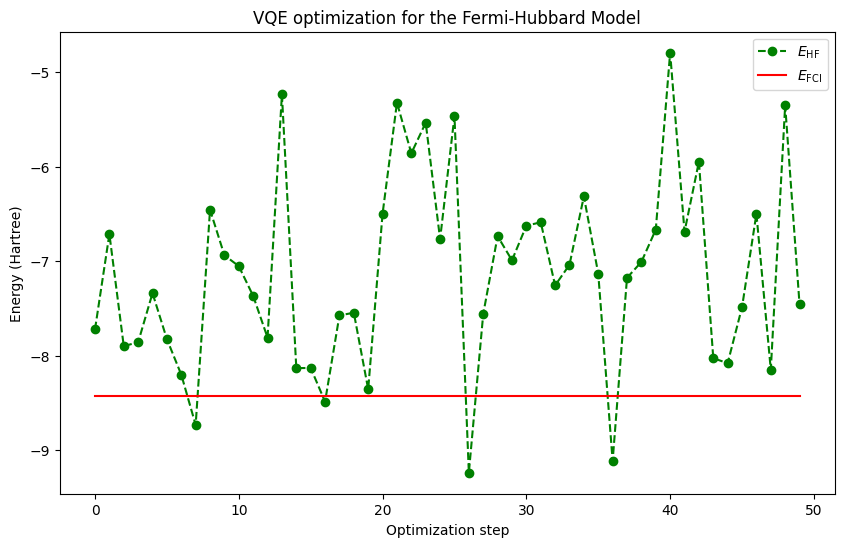

In [15]:
plot(-8.42442890089805, iteration, energies)

For trotter_steps = 2:

In [17]:
if __name__ == "__main__":
    run_algorithm = RunAlgorithm()
    _, iteration, energies = run_algorithm.get_result()

Computing VQE...

iteration 1
-5.406024766203047
Execution Time: 53.792083978652954 seconds
iteration 2
-6.239722953027403
Execution Time: 50.71140766143799 seconds
iteration 3
-5.745092887409631
Execution Time: 50.9707567691803 seconds
iteration 4
-9.094706649283632
Execution Time: 50.908178091049194 seconds
iteration 5
-6.005152089233877
Execution Time: 54.96883940696716 seconds
iteration 6
-8.27109211929986
Execution Time: 48.82109332084656 seconds
iteration 7
-5.720781802971621
Execution Time: 48.550182819366455 seconds
iteration 8
-6.431192859560051
Execution Time: 49.51039123535156 seconds
iteration 9
-5.821947188404873
Execution Time: 51.32106280326843 seconds
iteration 10
-6.488649350802056
Execution Time: 51.40658974647522 seconds
iteration 11
-6.948024143393418
Execution Time: 48.77799844741821 seconds
iteration 12
-6.410439313716983
Execution Time: 48.609726428985596 seconds
iteration 13
-8.621865867445976
Execution Time: 48.4429087638855 seconds
iteration 14
-6.823227596345

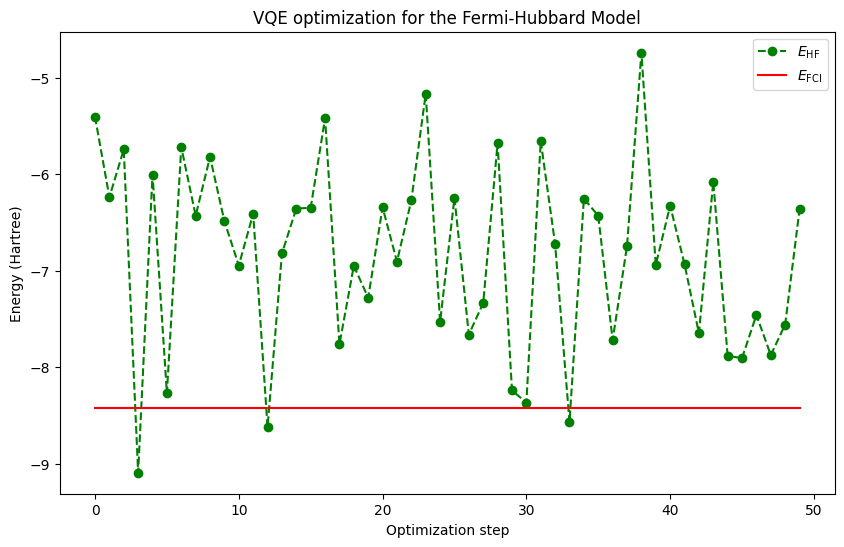

In [18]:
plot(-8.42442890089805, iteration, energies)

# Gradient-based: adam optimizer

In [13]:
import sys
from typing import Any

sys.path.append("../")
from utils.challenge_2023 import ChallengeSampling

challenge_sampling = ChallengeSampling(noise=True)

"""
####################################
add codes here
####################################
"""

import time
import numpy as np
from openfermion.transforms import jordan_wigner
from openfermion.utils import load_operator
from quri_parts.algo.optimizer import Adam, OptimizerStatus
from quri_parts.core.estimator.gradient import parameter_shift_gradient_estimates
from quri_parts.core.measurement import bitwise_commuting_pauli_measurement
from quri_parts.core.sampling.shots_allocator import (
    create_equipartition_shots_allocator,
)
from quri_parts.core.state import ParametricCircuitQuantumState, ComputationalBasisState
from quri_parts.openfermion.operator import operator_from_openfermion_op
from utils.challenge_2023 import TimeExceededError
from quri_parts.circuit.circuit_parametric import UnboundParametricQuantumCircuit

def cost_fn(hamiltonian, parametric_state, param_values, estimator):
    estimate = estimator(hamiltonian, parametric_state, [param_values])
    return estimate[0].value.real

def vqe(hamiltonian, parametric_state, estimator, init_params, optimizer):
    energies = []
    print('Computing VQE...\n')
    opt_state = optimizer.get_init_state(init_params)

    def c_fn(param_values):
        return cost_fn(hamiltonian, parametric_state, param_values, estimator)

    def g_fn(param_values):
        grad = parameter_shift_gradient_estimates(
            hamiltonian, parametric_state, param_values, estimator
        )
        return np.asarray([i.real for i in grad.values])

    for _ in range(50):
    #while True:
        try:
            start_time = time.time()
            opt_state = optimizer.step(opt_state, c_fn, g_fn)
            print(f"iteration {opt_state.niter}")
            _energy = opt_state.cost
            print(_energy)
            end_time = time.time()
            execution_time = end_time - start_time
            print("Execution Time:", execution_time, "seconds")
            energies.append(_energy)
        except TimeExceededError as e:
            print(str(e))
            return opt_state, energies

        if opt_state.status == OptimizerStatus.FAILED:
            print("Optimizer failed")
            break
        if opt_state.status == OptimizerStatus.CONVERGED:
            print("Optimizer converged")
            break
    return opt_state, energies

class RunAlgorithm:
    def __init__(self) -> None:
        challenge_sampling.reset()

    def result_for_evaluation(self) -> tuple[Any, float]:
        energy_final = self.get_result()
        qc_time_final = challenge_sampling.total_quantum_circuit_time

        return energy_final, qc_time_final

    def get_result(self) -> float:
        """
        ####################################
        add codes here
        ####################################
        """
        n_site, trotter_steps = 4, 1
        n_qubits = 2 * n_site
        ham = load_operator(
            file_name=f"{n_qubits}_qubits_H",
            data_directory="./hamiltonian",
            plain_text=False,
        )
        jw_hamiltonian = jordan_wigner(ham)
        hamiltonian = operator_from_openfermion_op(jw_hamiltonian)

        # Parameter Initialization:
        init_param = np.random.rand(trotter_steps * (n_site + n_qubits // 2))*2*np.pi*0.001
        
        ##### Circuit Ansatz: #####    
        hf_gates = ComputationalBasisState(n_qubits, bits=0b00001111).circuit.gates
        hf_circuit = quri_gates(n_site, trotter_steps, init_param, option = 1)
        hf_circuit.combine(hf_gates)        
        ##### Circuit Ansatz: #####

        parametric_state = ParametricCircuitQuantumState(n_qubits, hf_circuit)

        hardware_type = "it"
        shots_allocator = create_equipartition_shots_allocator()
        measurement_factory = bitwise_commuting_pauli_measurement
        n_shots = 10**3

        sampling_estimator = (
            challenge_sampling.create_concurrent_parametric_sampling_estimator(
                n_shots, measurement_factory, shots_allocator, hardware_type
            )
        )

        adam_optimizer = Adam(ftol=10e-5)

        result, energies = vqe(
            hamiltonian,
            parametric_state,
            sampling_estimator,
            init_param,
            adam_optimizer,
        )
        print(f"iteration used: {result.niter}")
        return result.cost, result.niter, energies

'''
if __name__ == "__main__":
    run_algorithm = RunAlgorithm()
    print(run_algorithm.get_result())
'''
if __name__ == "__main__":
    run_algorithm = RunAlgorithm()
    result, iteration, energies = run_algorithm.get_result()

Computing VQE...

iteration 1
-0.22978764583487418
Execution Time: 526.6041185855865 seconds
iteration 2
-0.779546518614457
Execution Time: 453.31823778152466 seconds
iteration 3
-0.6337379387193679
Execution Time: 459.19526290893555 seconds
iteration 4
-1.024144328374508
Execution Time: 458.46987795829773 seconds
iteration 5
-0.23895864315787693
Execution Time: 455.9041657447815 seconds
iteration 6
0.08005998449711377
Execution Time: 456.63580083847046 seconds
iteration 7
0.6310943498780025
Execution Time: 457.62385654449463 seconds
Reached maximum quantum circuit time 1000. Quantum circuit time 1002.513599999996
iteration used: 7


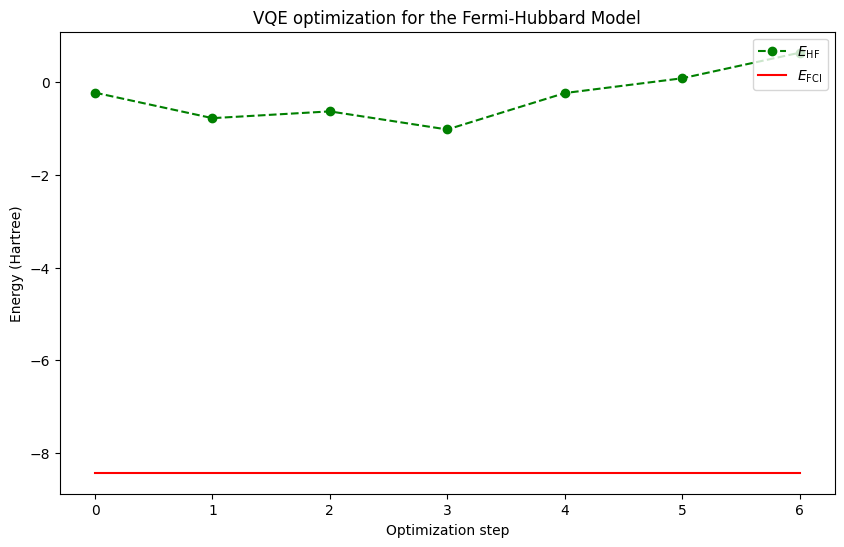

In [14]:
plot(-8.42442890089805, iteration, energies)

# Appendix

Let $A \in M^{m,m}$ be a $m$x$m$ involutory matrix, such that $A^2=\mathbb{I}$.

Using the Taylor series expansion for the exponential function of a square matrix $A$, given by

\begin{eqnarray}
e^{A}=\sum_{n=0}^{\infty}\frac{A^{n}}{n!} = \mathbb{I} +A+\frac{A^{2}}{2}+\frac{A^{3}}{3!}+\cdots+\frac{A^{n}}{n!},
\end{eqnarray}

one then has

\begin{eqnarray}
e^{\pm i\theta A} &=& \mathbb{I} \pm i\theta A + \frac{(i\theta A)^2}{2!} + \frac{(\pm i\theta A)^3}{3!} + \frac{(i\theta A)^4}{4!} +  \frac{(\pm i\theta A)^5}{5!} + \cdots + \frac{(\pm i\theta A)^n}{n!}\\
&=& \mathbb{I} \pm i\theta A - \frac{(\theta A)^2}{2!} \pm \frac{(i\theta A)^3}{3!} + \frac{(\theta A)^{4}}{4!} \pm \frac{(i\theta A)^5}{5!} + \cdots + \frac{(\pm i\theta A)^n}{n!} \\
&=& \mathbb{I} \pm i\theta A - \frac{\theta^2}{2!} \mathbb{I} \pm i \Bigg(\frac{-\theta^3}{3!}\Bigg) A + \frac{\theta^4}{4!} \mathbb{I} \pm i \frac{\theta^5}{5!}A + \cdots +\\
&=&\left(1-\frac{\theta^{2}}{2}+\frac{\theta^{4}}{4!}+\cdots+\right) \mathbb{I} \pm i\left(\theta-\frac{\theta^{3}}{3!}+\frac{\theta^{5}}{5!}+\cdots+\right)A\\
&=& \cos(\theta) \mathbb{I} \pm i \sin(\theta)A.
\end{eqnarray}

Q.E.D.

## Operator function

Given the spectral decomposition theorem, it is possible to write the operator function (matrix function) on a Normal matrix $\hat{O}$ as follows:

$$f(\hat{O})= \sum_j f(o_j) |o_j\rangle \langle o_j|,$$

which is equivalent to (after writing $\hat{O} = UDU^{\dagger}$)

\begin{eqnarray}
f(\hat{O}) = Uf(D)U^{\dagger}.
\end{eqnarray}

For the exponential function over the field $\mathbb{C}^n$ of the complex numbers, this becomes:

$$ e^{i\theta\hat{O}} = \sum_{j=1}^n e^{i\theta o_j} |o_j\rangle \langle o_j| = e^{i\theta o_1} |o_{1}\rangle \langle o_{1}| + \cdots + e^{i\theta o_n} |o_{n}\rangle \langle o_{n}|.$$

To see this is true, recall that the eigenvalues of a matrix are multiplied by a scalar when the matrix is multiplied by the same scalar, while the eigenvectors are left unchanged. One can extend this identity to a tensor product of Normal operators noting that `the tensor product of two Hermitian operators is another Hermitian operator`. Recall that Hermitian and Unitary operators are also Normal operators and, therefore, they also have a spectral decomposition in terms of the outer product representation.